In [59]:
import os
import numpy as np
import cv2
import gc

In [60]:
data = np.load('./data/data_preprocess.npz')

In [61]:
X = data['arr_0']
y = data['arr_1']

In [62]:
print(X)

[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.6453901  0.7659575 ]
   [0.         0.7092199  0.80851066]
   [0.         0.78723407 0.8014184 ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.59574467 0.73049647]
   [0.         0.6453901  0.75886524]
   [0.         0.6879433  0.79432625]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.5177305  0.68085104]
   [0.         0.56028366 0.70212764]
   [0.         0.6099291  0.75177306]]

  ...

  [[0.59574467 0.82978725 0.822695  ]
   [0.6099291  0.8439716  0.81560284]
   [0.59574467 0.822695   0.77304965]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.25531915 0.6099291  0.6524823 ]
   [0.3

In [63]:
print(y)

['Mask' 'Mask' 'Mask' ... 'Mask_Nose_Mouth' 'Mask_Nose_Mouth'
 'Mask_Nose_Mouth']


In [64]:
X.shape, y.shape

((9959, 100, 100, 3), (9959,))

In [65]:
np.unique(y)

array(['Mask', 'Mask_Chin', 'Mask_Mouth_Chin', 'Mask_Nose_Mouth'],
      dtype='<U15')

In [66]:
!pip install scikit-learn
import sklearn
from sklearn.preprocessing import OneHotEncoder

In [67]:
onehot = OneHotEncoder()
y_onehot = onehot.fit_transform(y.reshape(-1,1))

In [68]:
y_array = y_onehot.toarray()

In [69]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y_array,test_size=0.2,random_state=42)

In [70]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7967, 100, 100, 3), (1992, 100, 100, 3), (7967, 4), (1992, 4))

In [71]:
y_train

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.]])

In [72]:
cv2.imshow('a',x_train[-2])
cv2.waitKey()
cv2.destroyAllWindows()

In [73]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential

In [74]:
model = Sequential([
    layers.Conv2D(16,3,padding='same',input_shape=(100,100,3),activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(192,activation='relu'),
    layers.Dense(28,activation='relu'),
    layers.Dense(4,activation='sigmoid')
])


# compiling CNN
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [75]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0

In [76]:
history = model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),batch_size=30,epochs=20)

Epoch 1/20
266/266 [==============================] - 31s 113ms/step - loss: 0.2178 - accuracy: 0.9244 - val_loss: 0.1579 - val_accuracy: 0.9503
Epoch 2/20
266/266 [==============================] - 35s 131ms/step - loss: 0.0650 - accuracy: 0.9783 - val_loss: 0.0506 - val_accuracy: 0.9854
Epoch 3/20
266/266 [==============================] - 43s 161ms/step - loss: 0.0430 - accuracy: 0.9847 - val_loss: 0.0652 - val_accuracy: 0.9809
Epoch 4/20
266/266 [==============================] - 41s 153ms/step - loss: 0.0235 - accuracy: 0.9922 - val_loss: 0.0725 - val_accuracy: 0.9784
Epoch 5/20
266/266 [==============================] - 37s 138ms/step - loss: 0.0193 - accuracy: 0.9928 - val_loss: 0.0501 - val_accuracy: 0.9834
Epoch 6/20
266/266 [==============================] - 40s 152ms/step - loss: 0.0130 - accuracy: 0.9957 - val_loss: 0.0802 - val_accuracy: 0.9829
Epoch 7/20
266/266 [==============================] - 37s 138ms/step - loss: 0.0123 - accuracy: 0.9957 - val_loss: 0.0792 - val_ac

                                              0.0/7.6 MB ? eta -:--:--
                                              0.1/7.6 MB 8.9 MB/s eta 0:00:01
     --                                       0.4/7.6 MB 4.9 MB/s eta 0:00:02
     ----                                     0.9/7.6 MB 6.3 MB/s eta 0:00:02
     -----                                    1.1/7.6 MB 6.5 MB/s eta 0:00:02
     ------                                   1.3/7.6 MB 6.0 MB/s eta 0:00:02
     -------                                  1.5/7.6 MB 5.6 MB/s eta 0:00:02
     --------                                 1.7/7.6 MB 5.3 MB/s eta 0:00:02
     ---------                                1.9/7.6 MB 4.9 MB/s eta 0:00:02
     ----------                               2.0/7.6 MB 5.0 MB/s eta 0:00:02
     ----------                               2.0/7.6 MB 5.0 MB/s eta 0:00:02
     -----------                              2.2/7.6 MB 4.5 MB/s eta 0:00:02
     -------------                            2.6/7.6 MB 4.7 MB/s eta 0

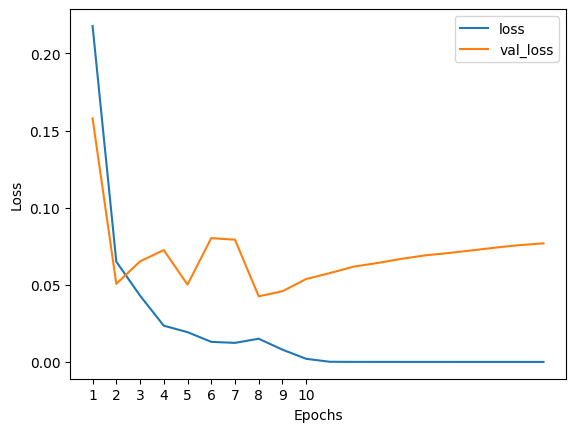

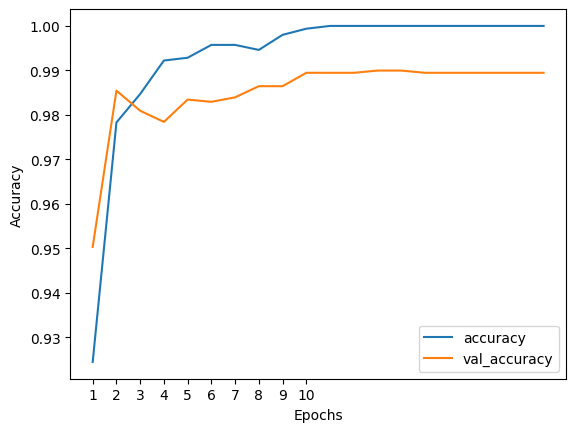

In [78]:
!pip install matplotlib
import pandas as pd
import matplotlib.pyplot as plt

history_df = pd.DataFrame(history.history)

history_df

history_df[['loss','val_loss']].plot(kind='line')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(list(range(10)),list(range(1,11)))
plt.show()

history_df[['accuracy','val_accuracy']].plot(kind='line')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(list(range(10)),list(range(1,11)))
plt.show()


In [79]:
model.save('face_cnn_model')

INFO:tensorflow:Assets written to: face_cnn_model\assets


INFO:tensorflow:Assets written to: face_cnn_model\assets


In [80]:
onehot.categories_

[array(['Mask', 'Mask_Chin', 'Mask_Mouth_Chin', 'Mask_Nose_Mouth'],
       dtype='<U15')]

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
history_df = pd.DataFrame(history.history)

NameError: name 'history' is not defined